# Linear Regrssion on US Housing Price

## Linear regression primer

In statistics, linear regression is a linear approach for modeling the relationship between a scalar dependent variable y and one or more explanatory variables (or independent variables) denoted X. The case of one explanatory variable is called simple linear regression. For more than one explanatory variable, the process is called multiple linear regression.

Linear regression models are often fitted using the least squares approach, but they may also be fitted in other ways, such as by minimizing the "lack of fit" in some other norm (as with least absolute deviations regression), or by minimizing a penalized version of the least squares loss function as in ridge regression ($L_2$-norm penalty) and lasso ($L_1$-norm penalty). Conversely, the least squares approach can be used to fit models that are not linear models. Thus, although the terms "least squares" and "linear model" are closely linked, they are not synonymous.

### Import packages and dataset

In [52]:
import numpy as np
import pandas as pd
from math import sqrt
import seaborn as sns
from scipy.stats import skew
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [53]:
plt.style.use(style='fivethirtyeight')
plt.rcParams['figure.figsize'] = (10, 6)

In [54]:
Original_df=pd.read_csv(r'USA_Housing - USA_Housing.csv')
Original_df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.94414,7.830362,6.137356,3.46,22837.36103,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.27543,6.999135,6.576763,4.02,25616.11549,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.68689,7.250591,4.805081,2.13,33266.14549,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.33124,5.534388,7.130144,5.44,42625.62016,1.198657e+06,USS Wallace\nFPO AE 73316


### Check basic info on the data set

**'info()' method to check the data types and number**

**'describe()' method to get the statistical summary of the various features of the data set**

In [55]:
Original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [56]:
Original_df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562390,5.322283,6.299250,3.140000,29403.928700,9.975771e+05
50%,68804.286405,5.970429,7.002902,4.050000,36199.406690,1.232669e+06
75%,75783.338665,6.650808,7.665871,4.490000,42861.290770,1.471210e+06
max,107701.748400,9.519088,10.759588,6.500000,69621.713380,2.469066e+06


**'columns' method to get the names of the columns (features)**

In [57]:
Original_df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [58]:
print("Number of rows    -> ",len(Original_df.index))
print("Number of Columns -> ",len(Original_df.columns))

Number of rows    ->  5000
Number of Columns ->  7


In [59]:
Original_df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

### Basic plotting and visualization on the data set

**Pairplots using seaborn**

<Axes: xlabel='Avg. Area Income', ylabel='Count'>

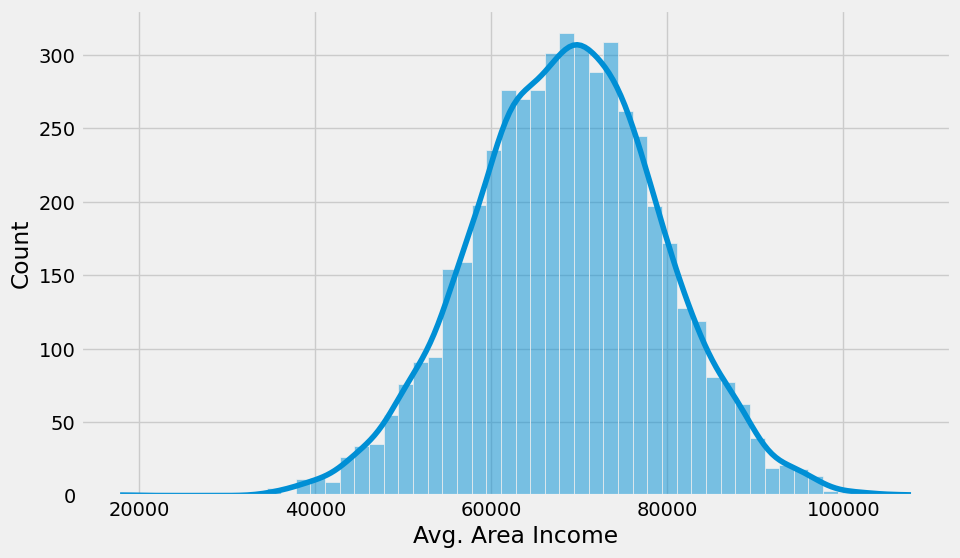

In [60]:
sns.histplot(data=Original_df, x='Avg. Area Income', kde=True)



<Axes: xlabel='Area Population', ylabel='Count'>

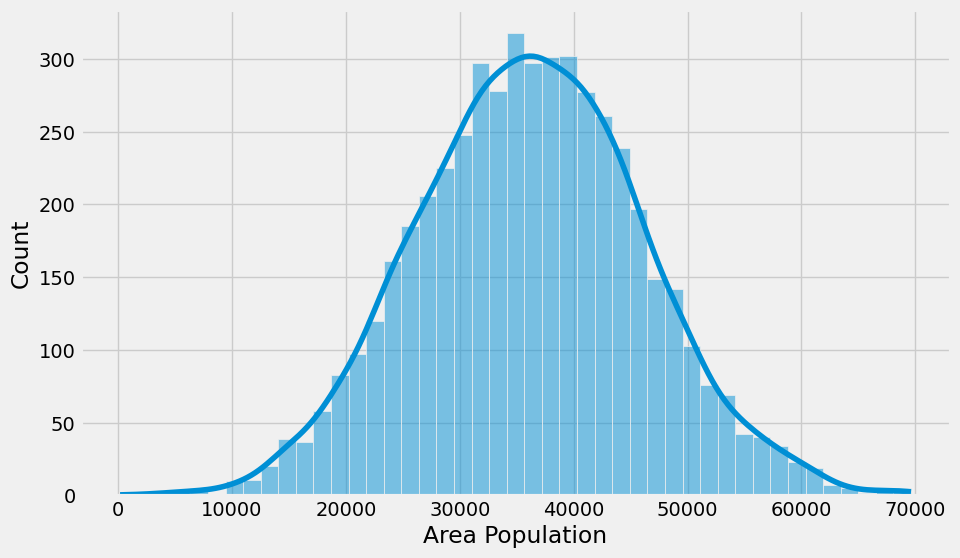

In [61]:

sns.histplot(data=Original_df, x='Area Population', kde=True)


<Axes: xlabel='Avg. Area House Age', ylabel='Count'>

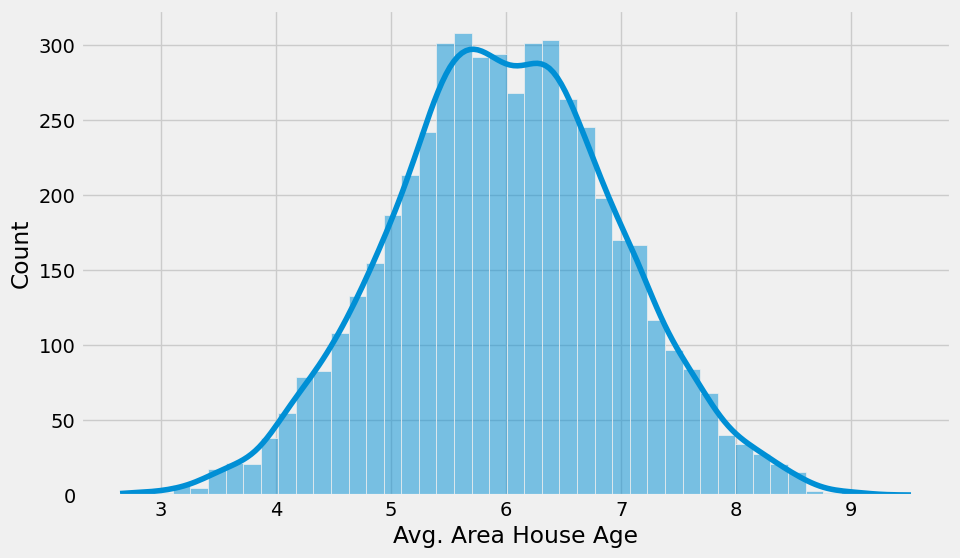

In [62]:
sns.histplot(data=Original_df, x='Avg. Area House Age', kde=True)

<Axes: xlabel='Avg. Area Number of Rooms', ylabel='Count'>

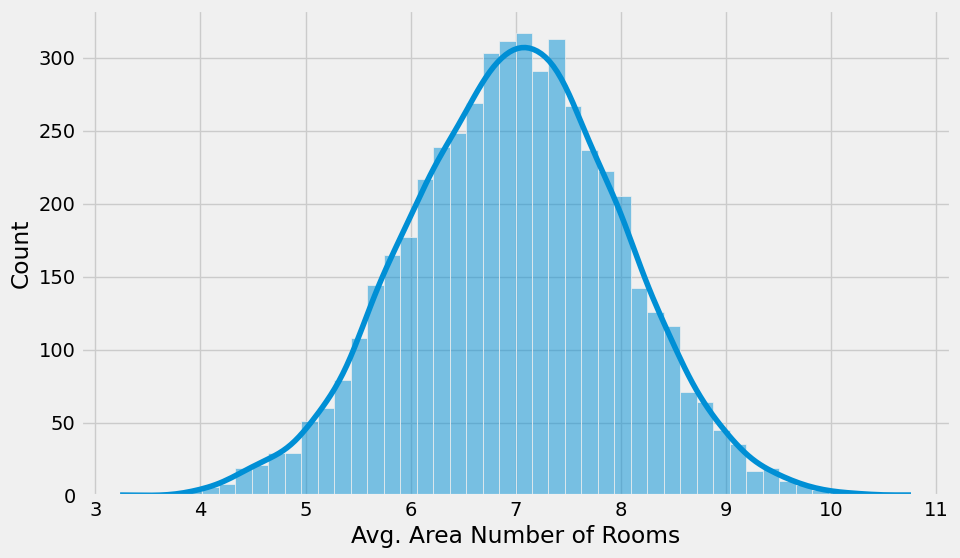

In [63]:
sns.histplot(data=Original_df, x='Avg. Area Number of Rooms', kde=True)


<Axes: xlabel='Avg. Area Number of Bedrooms', ylabel='Count'>

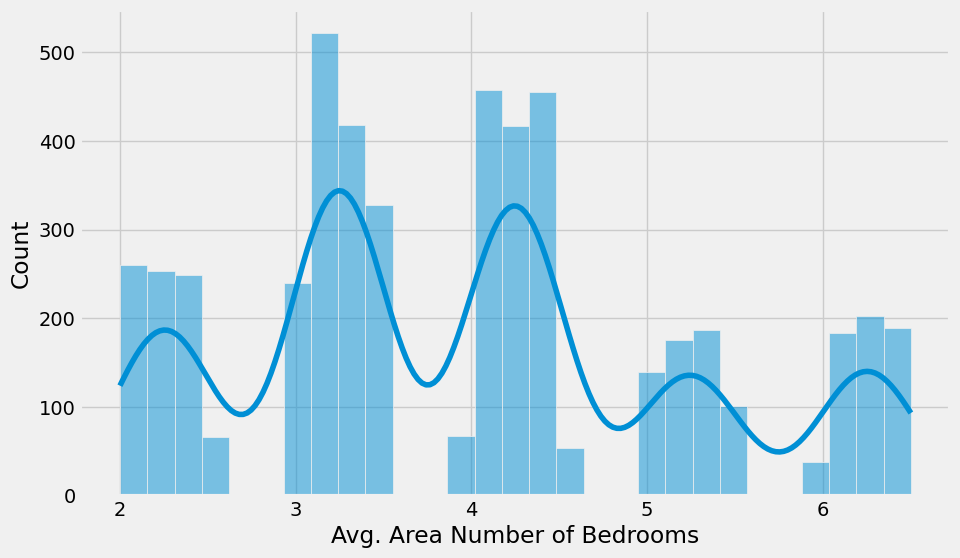

In [64]:
sns.histplot(data=Original_df, x='Avg. Area Number of Bedrooms', kde=True)


<Axes: xlabel='Price', ylabel='Count'>

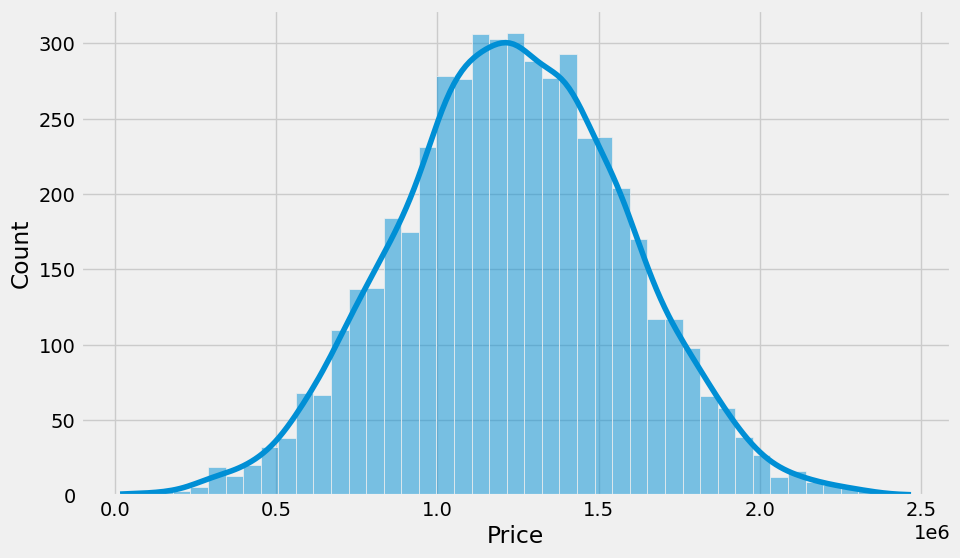

In [65]:
sns.histplot(data=Original_df, x='Price', kde=True)


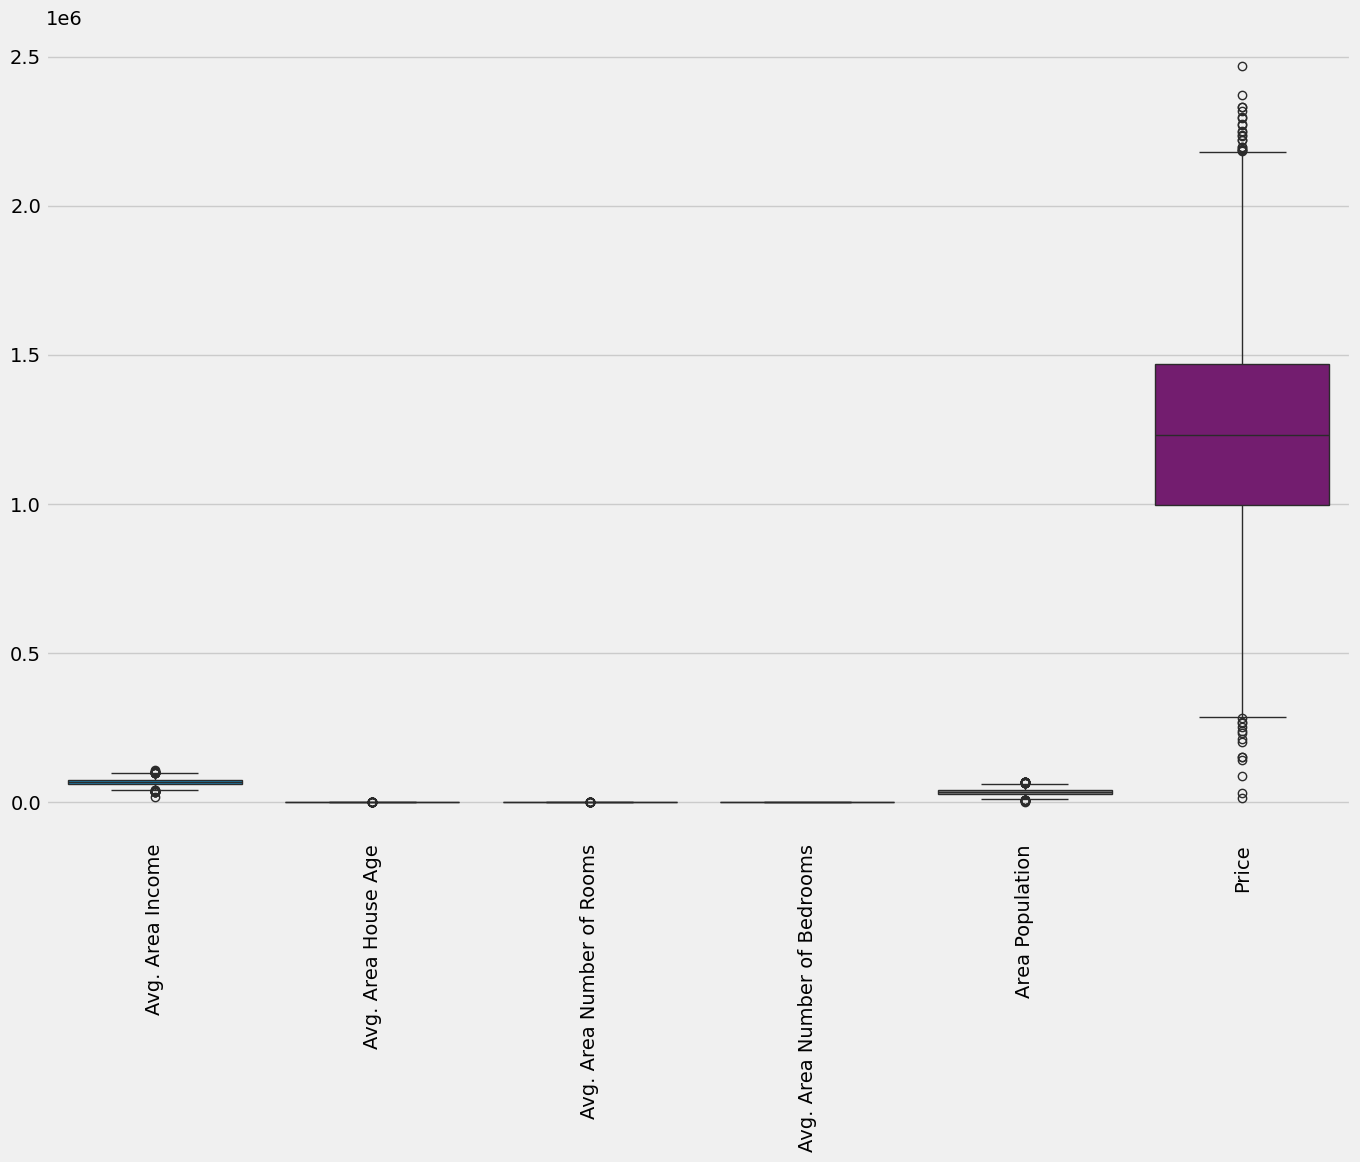

In [66]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=Original_df)
plt.xticks(rotation=90)
plt.show()

In [67]:
# Q1 = Original_df['Price'].quantile(0.25)
# Q3 = Original_df['Price'].quantile(0.75)
# IQR = Q3 - Q1

# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# mean_price = Original_df['Price'].mean()

# Original_df['Price'] = Original_df['Price'].apply(lambda x: mean_price if x < lower_bound or x > upper_bound else x)


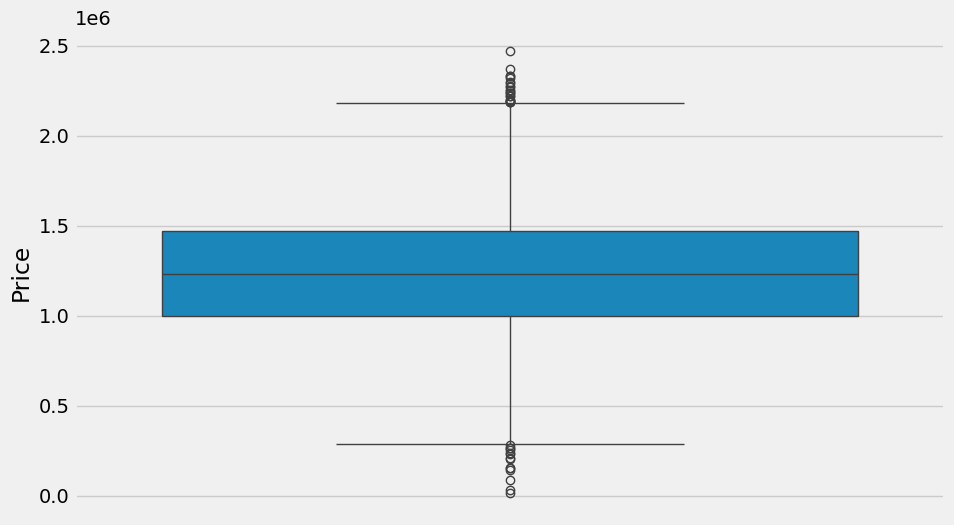

In [68]:
sns.boxplot(Original_df['Price'])
plt.show()

**Distribution of price (the predicted quantity)**

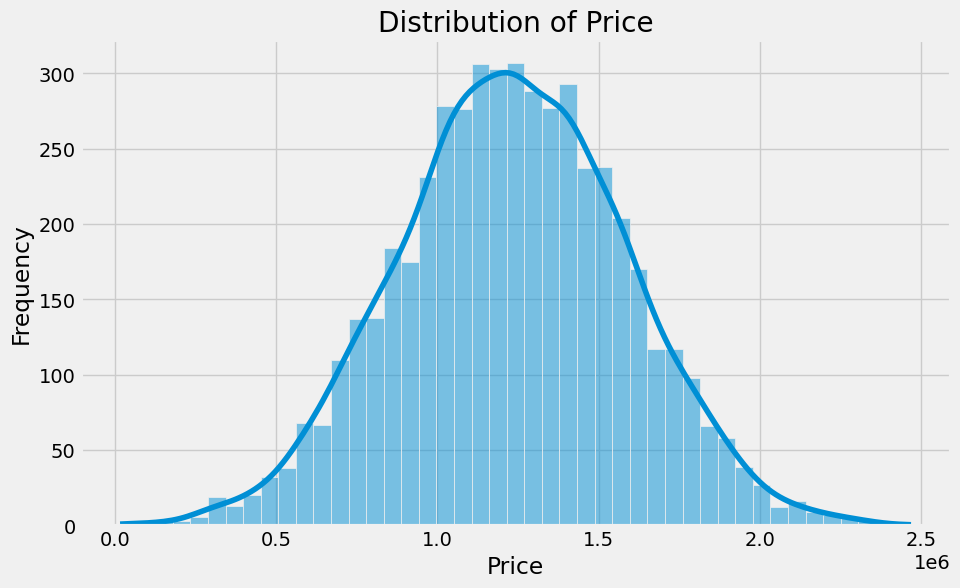

In [69]:
plt.figure(figsize=(10, 6))
sns.histplot(Original_df['Price'], kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [70]:
Original_df['Address'].unique()

array(['208 Michael Ferry Apt. 674\nLaurabury, NE 37010-5101',
       '188 Johnson Views Suite 079\nLake Kathleen, CA 48958',
       '9127 Elizabeth Stravenue\nDanieltown, WI 06482-3489', ...,
       '4215 Tracy Garden Suite 076\nJoshualand, VA 01707-9165',
       'USS Wallace\nFPO AE 73316',
       '37778 George Ridges Apt. 509\nEast Holly, NV 29290-3595'],
      dtype=object)

In [71]:
Updated_df=Original_df.copy()

In [72]:
Updated_df.drop(columns=['Address'],inplace=True)

In [73]:
Updated_df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')

**Correlation matrix and heatmap**

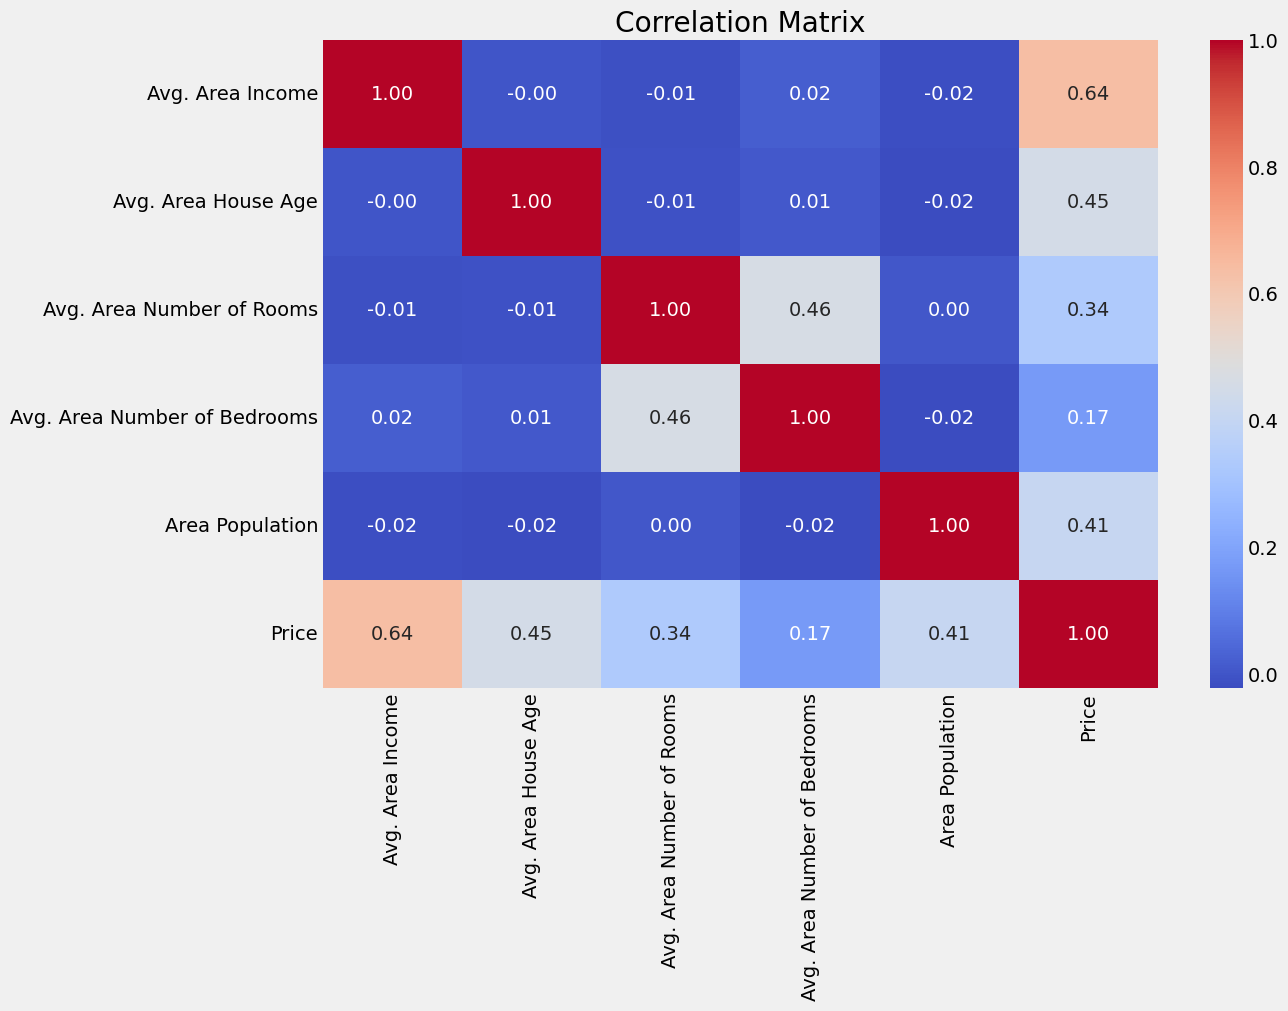

In [74]:
correlation_matrix = Updated_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


### Feature and variable sets

**Make a list of data frame column names**

In [75]:
print([Original_df.columns])

[Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')]


**Put all the numerical features in X and Price in y, ignore Address which is string for linear regression**

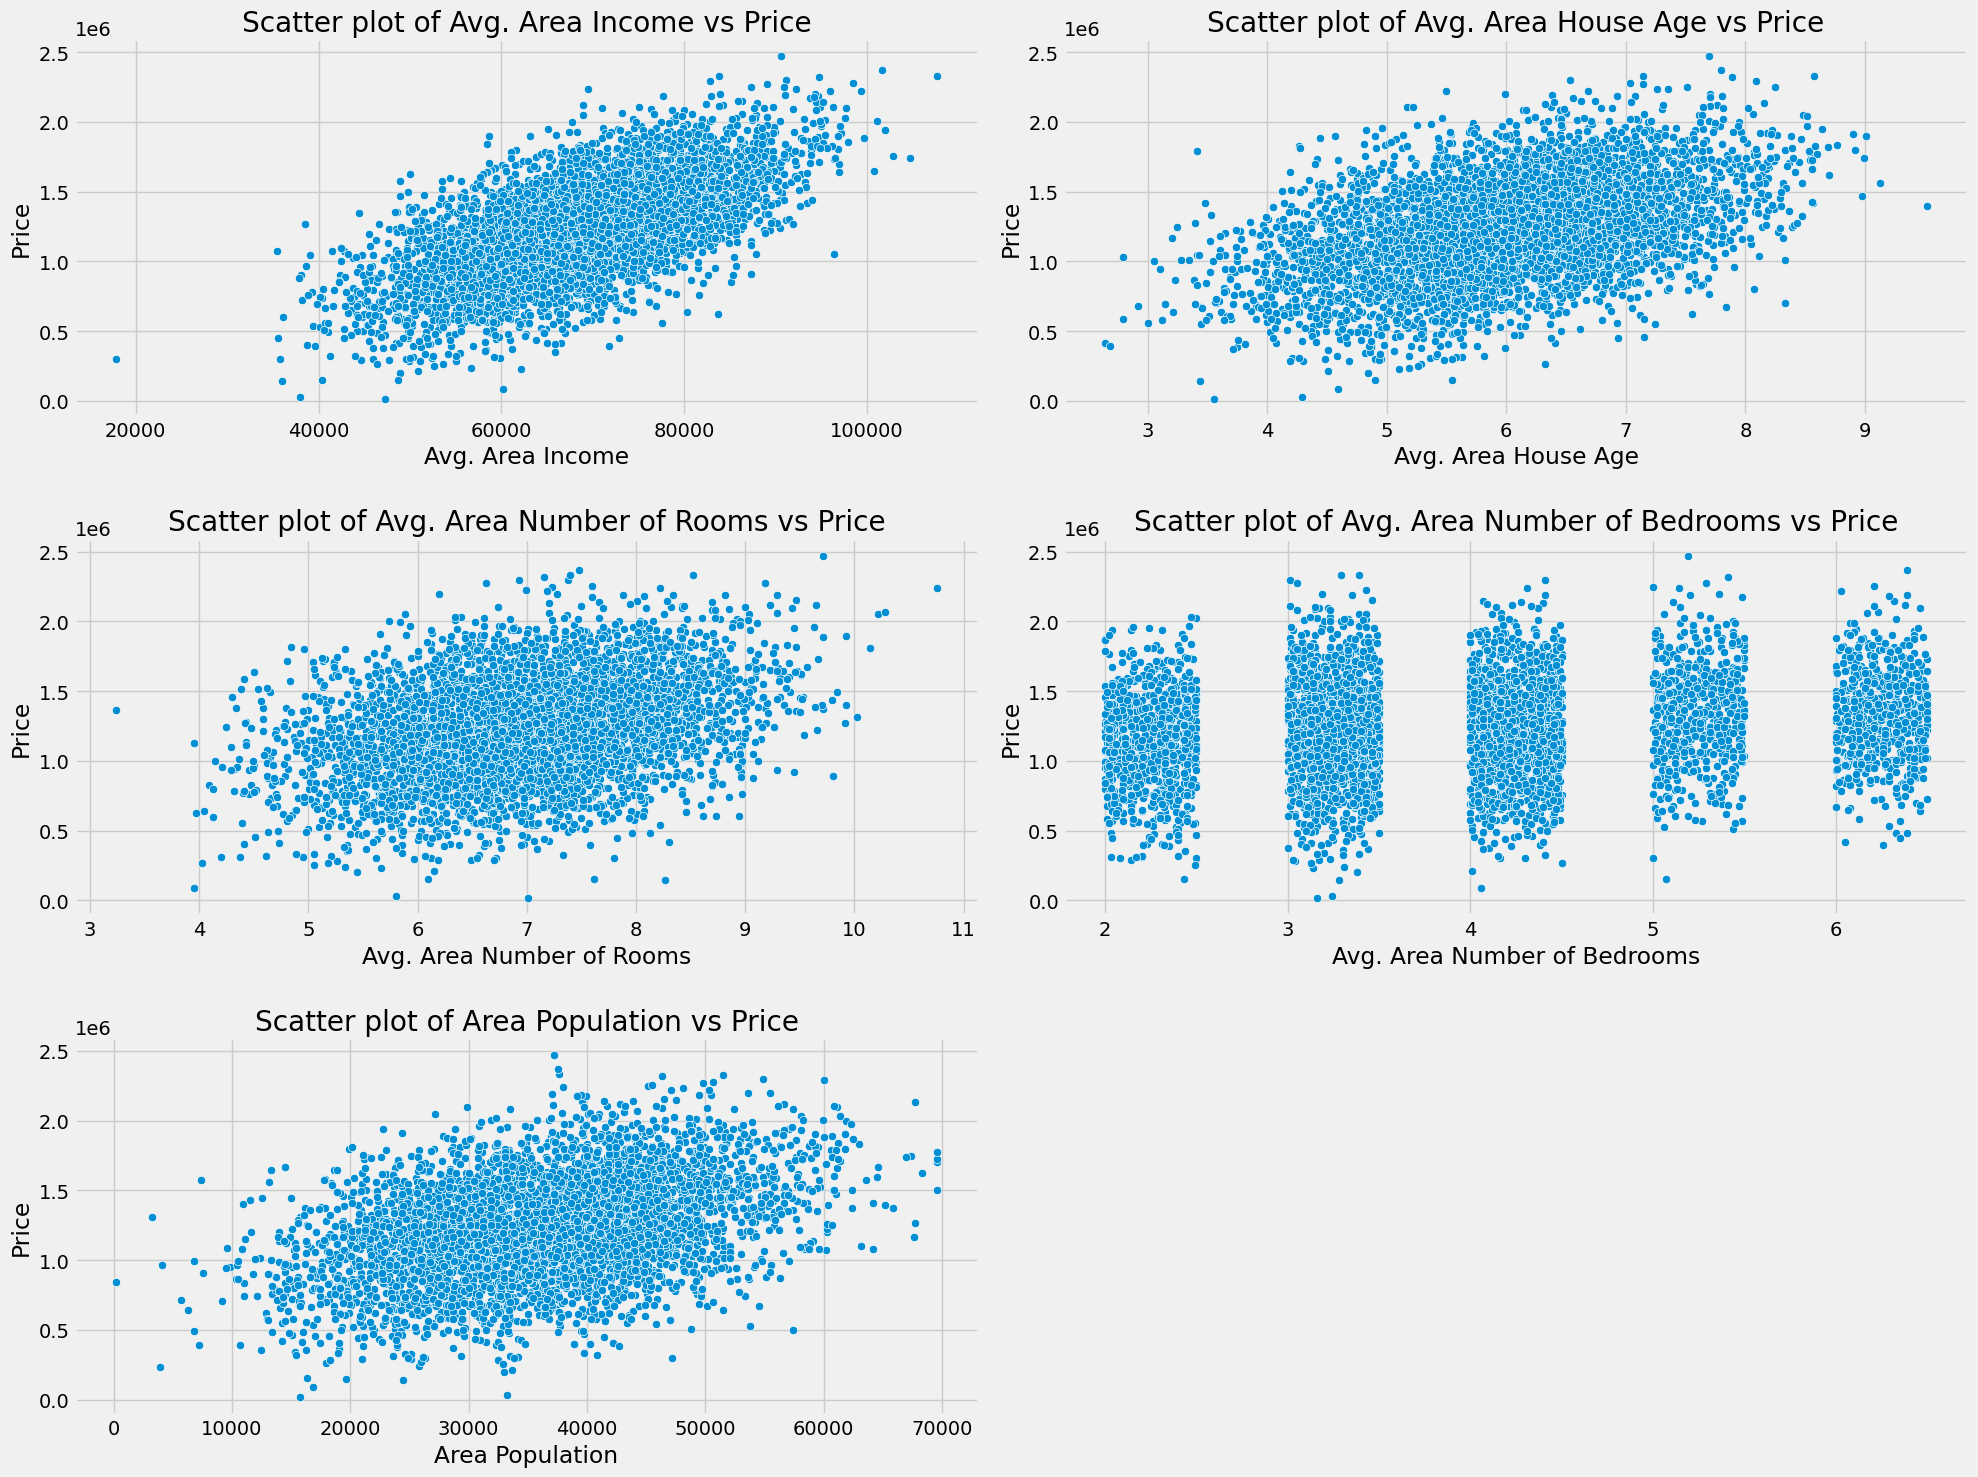

In [76]:
columns = ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
           'Avg. Area Number of Bedrooms', 'Area Population']

plt.figure(figsize=(20, 15))

for i, col in enumerate(columns, 1):
    plt.subplot(3, 2, i)
    sns.scatterplot(x=Original_df[col], y=Original_df['Price'])
    plt.title(f'Scatter plot of {col} vs Price')
    plt.xlabel(col)
    plt.ylabel('Price')

plt.tight_layout()
plt.show()


### Test-train split

**Import train_test_split function from scikit-learn**

In [77]:
from sklearn.model_selection import train_test_split

**Create X and y train and test splits in one command using a split ratio and a random seed**

In [78]:
X=Updated_df.drop(columns=['Price'],axis=1)
y=Updated_df['Price']
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

**Check the size and shape of train/test splits (it should be in the ratio as per test_size parameter above)**

In [79]:
print("x_train > ",x_train.shape)
print("x_test > ",x_test.shape)
print("y_train > ",y_train.shape)
print("y_test > ",y_test.shape)


x_train >  (4000, 5)
x_test >  (1000, 5)
y_train >  (4000,)
y_test >  (1000,)


### Model fit and training

**Import linear regression model estimator from scikit-learn and instantiate**

In [80]:
from sklearn import linear_model
linearModel=linear_model.LinearRegression()

**Fit the model on to the instantiated object itself**

In [81]:
model=linearModel.fit(x_train,y_train)
predictions=model.predict(x_test)

**Check the intercept and coefficients and put them in a DataFrame**

In [82]:
model.intercept_

np.float64(-2635072.900916781)

### Calculation of standard errors and t-statistic for the coefficients

In [83]:
print ('MAE is:', mean_absolute_error(y_test, predictions))
print ('MSE is:', mean_squared_error(y_test, predictions))
print ('RMSE is:', sqrt(mean_squared_error(y_test, predictions)))

MAE is: 80879.09722218299
MSE is: 10089009299.499416
RMSE is: 100444.06054864278


In [84]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
y_pred=model.predict(x_test)
r2=r2_score(y_test,y_pred)
r2

0.917997170698532

**R-square of the model fit**

In [34]:
print ('MAE is:', mean_absolute_error(y_test, predictions))
print ('MSE is:', mean_squared_error(y_test, predictions))
print ('RMSE is:', sqrt(mean_squared_error(y_test, predictions)))


MAE is: 86887.02968596725
MSE is: 15043279103.508492
RMSE is: 122651.04607588348


### Prediction, error estimate, and regression evaluation matrices

**Prediction using the lm model**

**Scatter plot of predicted price and y_test set to see if the data fall on a 45 degree straight line**

Text(0.5, 1.0, 'Linear Regression Model')

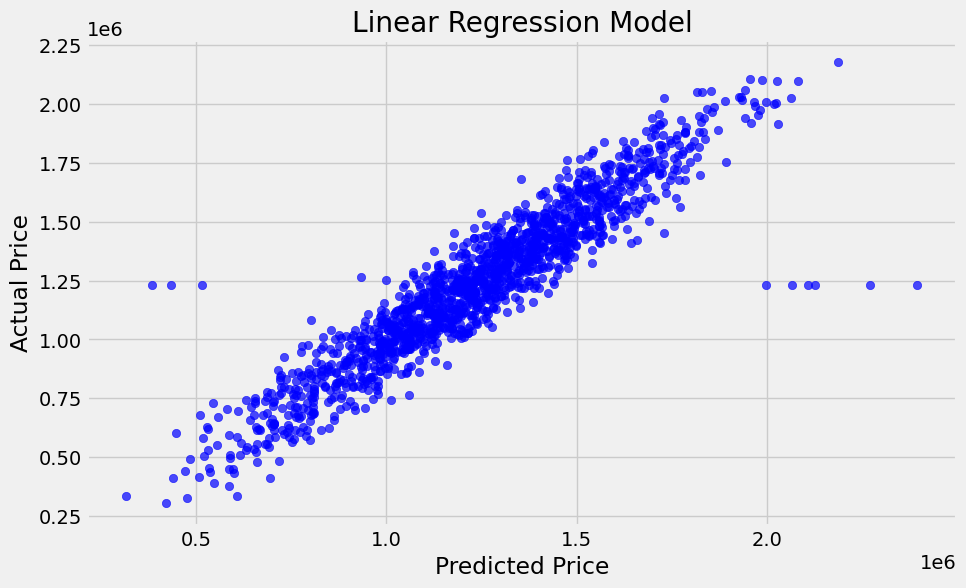

In [35]:
plt.scatter(predictions, y_test, alpha = 0.7, color = 'b')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')

**Plotting histogram of the residuals i.e. predicted errors (expect a normally distributed pattern)**

**Scatter plot of residuals and predicted values (Homoscedasticity)**

**Regression evaluation metrices**

**R-square value**